<a href="https://colab.research.google.com/github/Mahnoor-14/Personality-Driven-Experiences/blob/main/Personality_DrivenExperiences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/ATom/ML_CASE_STUDY_Personality-Driven Experiences/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
df["Personality"].value_counts()
# column--- less than 10 unique values in numb--- categorical

,count
Personality,
Extrovert,1491
Introvert,1409


In [6]:
df["Drained_after_socializing"].value_counts()


,count
Drained_after_socializing,
No,1441
Yes,1407


In [7]:
df["Friends_circle_size"].nunique()

16

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify the target variable, and gain initial insights.


**Reasoning**:
Examine the data types, descriptive statistics, value counts, and correlations to understand the dataset's structure and identify the target variable.  Visualize the distribution of numerical features to identify outliers.



Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.00000

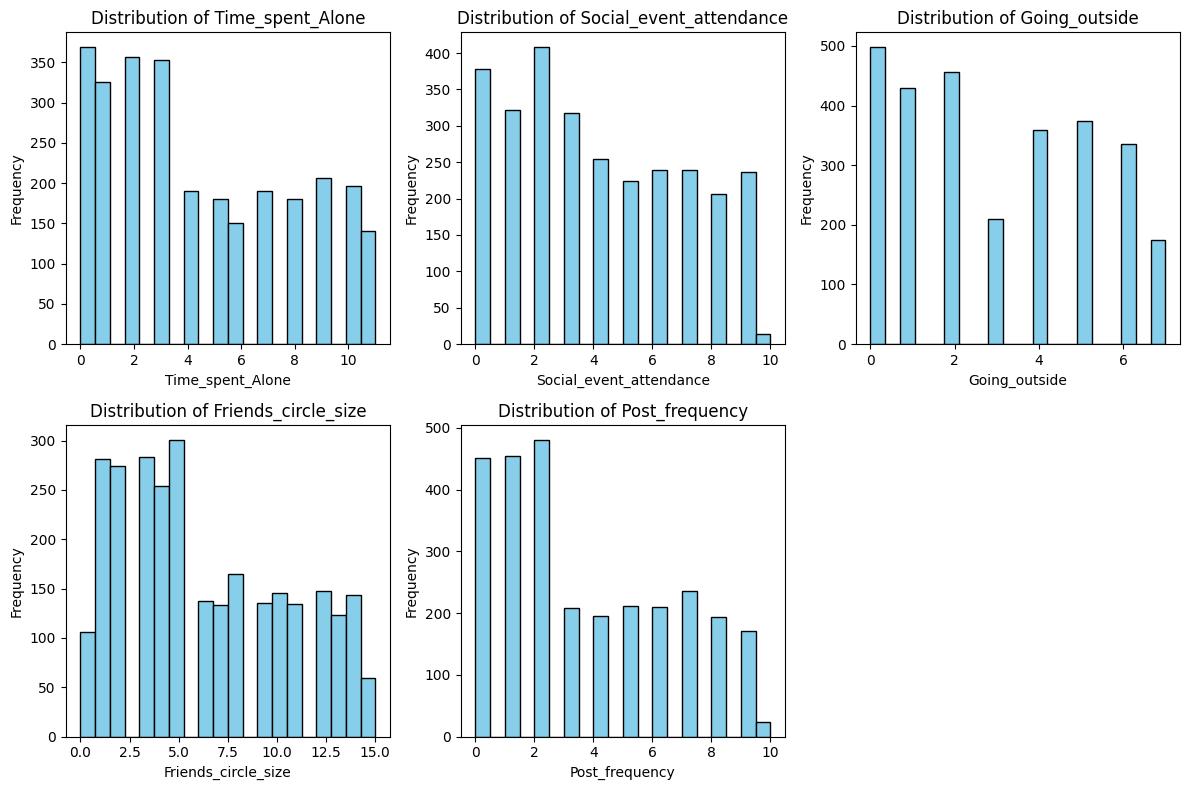

ValueError: could not convert string to float: 'No'

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df.dtypes)

# 2. Descriptive statistics for numerical features
print(df.describe())

# 3. Value counts for categorical features
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# 4. Visualize numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 5. Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Determine the target variable
# 'Personality' appears to be the target variable as it's the outcome we want to predict.
target_variable = 'Personality'
print(f"The target variable is: {target_variable}")

**Reasoning**:
The previous code failed due to non-numeric data in the correlation calculation.  Need to handle non-numeric columns appropriately.  The target variable is identified as 'Personality'.



In [ ]:
# 5. Correlation matrix and heatmap
correlation_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types (already done)
# 2. Descriptive statistics for numerical features (already done)
# 3. Value counts for categorical features (already done)
# 4. Visualize numerical features (already done, but with a ValueError)

# 5. Correlation matrix and heatmap (handle non-numeric data)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Determine the target variable (already done)
target_variable = 'Personality'
print(f"The target variable is: {target_variable}")

Time_spent_Alone	Stage_fear	Social_event_attendance	Going_outside	Drained_after_socializing	Friends_circle_size	Post_frequency	Personality

In [ ]:
#hypothesis testing to see how inputs are correlated with output
#post frew-- personality ---annova
#Drained_after_socializing  + personality----chi square
#stage fear + perosanlity---chia square

In [ ]:
#annova Test
# Drop any missing values if necessary
df = df.dropna(subset=['Post_frequency', 'Personality'])

# Group the data by Personality
groups = [group['Post_frequency'].values for name, group in df.groupby('Personality')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Drop missing values in both columns
df_clean = df.dropna(subset=['Drained_after_socializing', 'Personality'])

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df_clean['Drained_after_socializing'], df_clean['Personality'])

# Step 2: Run the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)


In [ ]:
df_clean = df.dropna(subset=['Stage_fear'])

# Step 1: Create a contingency table
contingency = pd.crosstab(df_clean['Stage_fear'], df_clean['Personality'])

# Step 2: Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

# Output
print("Contingency Table:")
print(contingency)
print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)


## Data cleaning

### Subtask:
Clean the personality dataset by handling missing values, removing duplicates, and addressing outliers.


In [11]:

df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [12]:
for col in df.columns:
  print(col)
  print(df[col].isnull().sum())
  print(df[col].value_counts())
  print("------------------------------")

Time_spent_Alone
63
Time_spent_Alone
0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
8.0     180
5.0     180
6.0     150
11.0    140
Name: count, dtype: int64
------------------------------
Stage_fear
73
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
------------------------------
Social_event_attendance
62
Social_event_attendance
2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
10.0     14
Name: count, dtype: int64
------------------------------
Going_outside
66
Going_outside
0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
Name: count, dtype: int64
------------------------------
Drained_after_socializing
52
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
------------------------------
Friends_circle_size
77
Friends_circle_size
5.0     301
3.0     283
1.0     281
2.0     274
4.0     254
8

In [13]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# Duplicate Removal
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

# Outlier Detection and Handling (IQR Method)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df.loc[(df[col] < lower_bound), col] = lower_bound
    df.loc[(df[col] > upper_bound), col] = upper_bound
    print(f"Number of outliers replaced in '{col}': {num_outliers}")

Number of duplicate rows removed: 448
Number of outliers replaced in 'Time_spent_Alone': 0
Number of outliers replaced in 'Social_event_attendance': 0
Number of outliers replaced in 'Going_outside': 0
Number of outliers replaced in 'Friends_circle_size': 0
Number of outliers replaced in 'Post_frequency': 0


## Data preparation

### Subtask:
Prepare the data for model training by converting categorical features into numerical representations.


In [14]:
# Identify categorical columns
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Check the shape of the encoded DataFrame
print(df_encoded.shape)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


(2452, 8)


In [15]:
# Create interaction terms
df_encoded['Social_Alone_Interaction'] = df_encoded['Social_event_attendance'] * df_encoded['Time_spent_Alone']
df_encoded['GoingOut_Friends_Interaction'] = df_encoded['Going_outside'] * df_encoded['Friends_circle_size']

# Create polynomial features
df_encoded['Time_Spent_Alone_Squared'] = df_encoded['Time_spent_Alone']**2
df_encoded['Post_Frequency_Cubed'] = df_encoded['Post_frequency']**3

# Evaluate the impact of new features (example using correlation)
correlation_with_target = df_encoded.corr()['Personality_Introvert'].abs().sort_values(ascending=False)
print(correlation_with_target)

# Remove features with low correlation (example threshold)
correlation_threshold = 0.05
features_to_remove = correlation_with_target[correlation_with_target < correlation_threshold].index
df_encoded = df_encoded.drop(columns=features_to_remove)

display(df_encoded.head())
print(df_encoded.shape)

Personality_Introvert            1.000000
Stage_fear_Yes                   0.821991
Drained_after_socializing_Yes    0.820291
Going_outside                    0.709168
Time_spent_Alone                 0.697855
Social_event_attendance          0.696299
Post_frequency                   0.690380
GoingOut_Friends_Interaction     0.670397
Friends_circle_size              0.660079
Time_Spent_Alone_Squared         0.626189
Post_Frequency_Cubed             0.505242
Social_Alone_Interaction         0.026945
Name: Personality_Introvert, dtype: float64


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert,GoingOut_Friends_Interaction,Time_Spent_Alone_Squared,Post_Frequency_Cubed
0,4.0,4.0,6.0,13.0,5.0,False,False,False,78.0,16.0,125.0
1,9.0,0.0,0.0,0.0,3.0,True,True,True,0.0,81.0,27.0
2,9.0,1.0,2.0,5.0,2.0,True,True,True,10.0,81.0,8.0
3,0.0,6.0,7.0,14.0,8.0,False,False,False,98.0,0.0,512.0
4,3.0,9.0,4.0,8.0,5.0,False,False,False,32.0,9.0,125.0


(2452, 11)


In [16]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('Personality_Introvert', axis=1)
y = df_encoded['Personality_Introvert']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1961, 10)
y_train shape: (1961,)
X_val shape: (245, 10)
y_val shape: (245,)
X_test shape: (246, 10)
y_test shape: (246,)


## Model training

### Subtask:
Train Logistic Regression, KNN, and Decision Tree classifiers.


**Reasoning**:
Train Logistic Regression, KNN, and Decision Tree classifiers using the training data.



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers with default hyperparameters
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers with adjusted hyperparameters
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print(logreg_model)
print(knn_model)
print(dt_model)

LogisticRegression(max_iter=1000)
KNeighborsClassifier()
DecisionTreeClassifier()


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' supports l1
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5)
logreg_grid.fit(X_train, y_train)
optimized_logreg_model = logreg_grid.best_estimator_

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Test a range of neighbor values
    'metric': ['euclidean', 'manhattan','minkowski']  # Explore distance metrics
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_grid.fit(X_train, y_train)
optimized_knn_model = knn_grid.best_estimator_

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': range(1, 11),  # Explore various tree depths
    'min_samples_split': [2, 5, 10],  # Adjust minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],  # Adjust minimum samples per leaf
    'criterion': ['gini', 'entropy', 'log_loss']  # Explore different split criteria
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)
optimized_dt_model = dt_grid.best_estimator_

print("Optimized Logistic Regression Model:", optimized_logreg_model)
print("Optimized KNN Model:", optimized_knn_model)
print("Optimized Decision Tree Model:", optimized_dt_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Optimized Logistic Regression Model: LogisticRegression(C=0.001, max_iter=1000, penalty='l1', solver='liblinear')
Optimized KNN Model: KNeighborsClassifier(metric='manhattan', n_neighbors=9)
Optimized Decision Tree Model: DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predict on the test set
logreg_pred = optimized_logreg_model.predict(X_test)
knn_pred = optimized_knn_model.predict(X_test)
dt_pred = optimized_dt_model.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_pred)
knn_metrics = evaluate_model(y_test, knn_pred)
dt_metrics = evaluate_model(y_test, dt_pred)

# Create a summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    [logreg_metrics, knn_metrics, dt_metrics],
    index=model_names,
    columns=metrics
)
display(results)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.958333,0.951613,0.967213,0.959350,0.958183
KNN,0.958333,0.951613,0.967213,0.959350,0.958183
Decision Tree,0.954167,0.951220,0.959016,0.955102,0.954084


In [21]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


# SVM model
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=2, verbose=2)
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1